In [47]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style, quantity_support
#plt.style.use(astropy_mpl_style)
quantity_support()
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.coordinates import get_sun
import matplotlib as mpl
import seaborn as sns
sns.set(font="sans-serif",font_scale=1.6,style="ticks")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
coords = ["17:51:52.9 -28:35:41"] # (l,b)=(1,-1)
gb = SkyCoord(coords,unit=(u.hourangle, u.deg))
Sutherland = EarthLocation.of_site("SALT")
utcoffset = +2*u.hour  # South African Time

In [17]:
Nbin=24*30 #2min
sun_night     = 0
sun_twillight = -15
gb_low        = 20 

time_start = Time('2023-01-01 00:00:00') - 2*u.hour # Sutherland local time
gb_l=[]
twi_l = []
night_l=[]
for i in np.arange(365):
    print("\r",i,end="")
    time0     = time_start + i*u.day # 0:00 am in Sutherland
    time      = time0 + np.linspace(-12,12,Nbin)*u.hour # Local Time
    gb_altaz  = gb.transform_to(AltAz(obstime=time,location=Sutherland)) # altitude for GB
    sun_altaz = get_sun(time).transform_to(AltAz(obstime=time,location=Sutherland)) # altitude for Sun
    gb_obs = (gb_altaz.alt.value>gb_low)&(sun_altaz.alt.value<sun_twillight)
    twil   = (sun_altaz.alt.value<sun_twillight)
    night  = (sun_altaz.alt.value<sun_night)
    gb_l.append(np.sum(gb_obs)/len(gb_obs))
    twi_l.append(np.sum(twil)/len(twil))
    night_l.append(np.sum(night)/len(night))
gb_l=np.array(gb_l)
twi_l=np.array(twi_l)
night_l=np.array(night_l)

 364

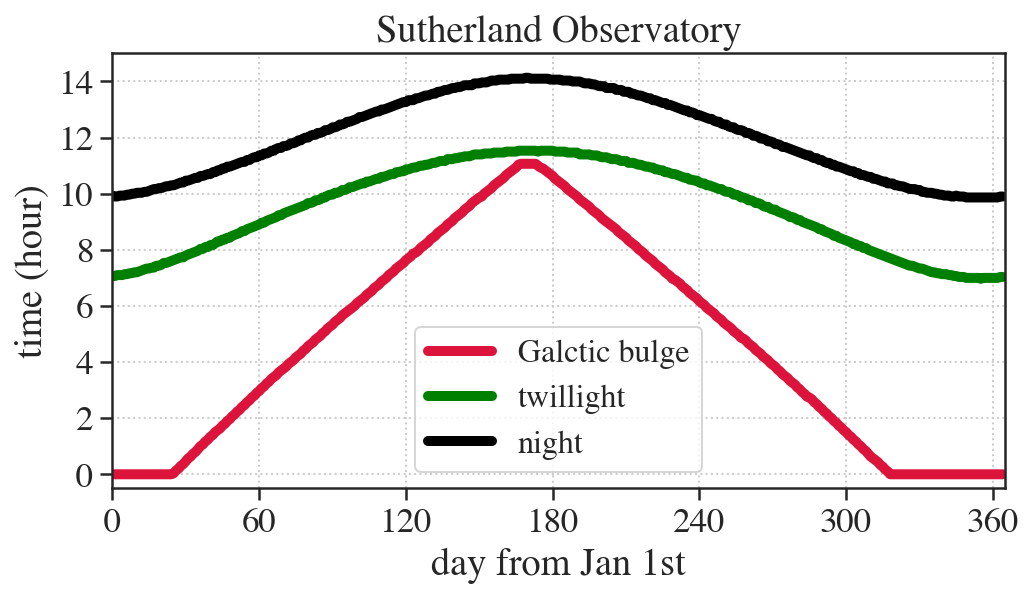

In [64]:
sns.set(font="times",font_scale=1.6,style="ticks")
plt.figure(figsize=(8,4))
plt.plot(gb_l*24,lw=5,c="crimson",label="Galctic bulge")
plt.plot(twi_l*24,lw=5,c="green",label="twillight")
plt.plot(night_l*24,lw=5,c="black",label="night")
plt.grid(ls=":")
plt.xlabel("day from Jan 1st")
plt.xticks(np.arange(0,365,60))
plt.yticks(np.arange(0,16,2))
plt.ylabel("time (hour)")
plt.title("Sutherland Observatory")
plt.legend(fontsize=16)
plt.xlim(0,365)
plt.ylim(-0.5,15)
plt.show()